# Project 3: Crystal Lattice

In [1]:
from vpython import *
import numpy as np
import random
%matplotlib ipympl
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Classes
I have two classes a spring class to create springs and a lattice class to create the lattice structure

In [2]:
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
        #spring = helix()
        #spring.pos = start.pos
        #spring.axis = end.pos-start.pos
        #spring.visible = visible
        #spring.thickness = 0.05
        #spring.radius = 0.5*.25
        #spring.length = mag(end.pos-start.pos)
        #spring.start = start
        #spring.end = end
        #spring.color = color.orange
        
        
class lattice:


    def __init__(self):
        self.atoms = []
        self.springs = []
        for z in range(0,3,1):
            for y in range(0,3,1):
                for x in range(0,3,1):
                    atom = sphere(radius = 0.25,color = color.blue)
                    atom.pos = vector(x,y,z)
                    atom.velocity = vector(random.uniform(-0.5, 0.5), random.uniform(-0.5, 0.5), random.uniform(-0.5, 0.5) )
                    atom.old_velocity = atom.velocity
                    atom.index = len(self.atoms)
                    self.atoms.append(atom)
        for atom in self.atoms:
            if atom.pos.x == 0 or atom.pos.x == 1:
                sp = spring(atom,self.atoms[atom.index+1])
                self.springs.append(sp)
                if atom.pos.y == 0 or atom.pos.y == 1 :
                    sp = spring(atom,self.atoms[atom.index+4])
                    self.springs.append(sp)
                if atom.pos.z == 0 or atom.pos.z == 1 :
                    sp = spring(atom, self.atoms[atom.index+10])
                    self.springs.append(sp)
            if atom.pos.y == 0 or atom.pos.y == 1:
                sp = spring(atom,self.atoms[atom.index+3])
                self.springs.append(sp)
                if atom.pos.z == 0 or atom.pos.z == 1:
                    sp = spring(atom, self.atoms[atom.index + 12])
                    self.springs.append(sp)
            if atom.pos.z == 0 or atom.pos.z == 1:
                sp = spring(atom, self.atoms[atom.index + 9])
                self.springs.append(sp)
            if atom.pos.x == 1 or atom.pos.x == 2:
                if atom.pos.y == 0 or atom.pos.y == 1 :
                    sp = spring(atom,self.atoms[atom.index+2])
                    self.springs.append(sp)
                if atom.pos.z == 0 or atom.pos.z == 1 :
                    sp = spring(atom, self.atoms[atom.index+8])
                    self.springs.append(sp)
            if atom.pos.y == 1 or atom.pos.y == 2:
                if atom.pos.z == 0 or atom.pos.z == 1 :
                    sp = spring(atom, self.atoms[atom.index+6])
                    self.springs.append(sp)


## Simulation Parameters and Initial Conditions

The three methods of integration I have chosen for this simulation are Forward Euler, Backward Euler, and Trapezoid. The atoms are given a random velocity to start each simulation. Each type of integration has 3 diffferent time steps and runtimes: Dt of 0.01 sec and a total runtime of 3 seconds, Dt of 0.001 sec and a total runtime of 1 second, Dt of 0.0001 sec and a total runtime of 0.1 second.

## Explicit Integration Dt = 0.01 sec Total Runtime = 3 seconds

In [3]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.01
while t < 3:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        atom.pos = atom.pos + atom.velocity * dt
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.7278124406709994
2.732526642239143


## Plot for explicit, Dt = 0.01 sec, Total Runtime = 3 seconds

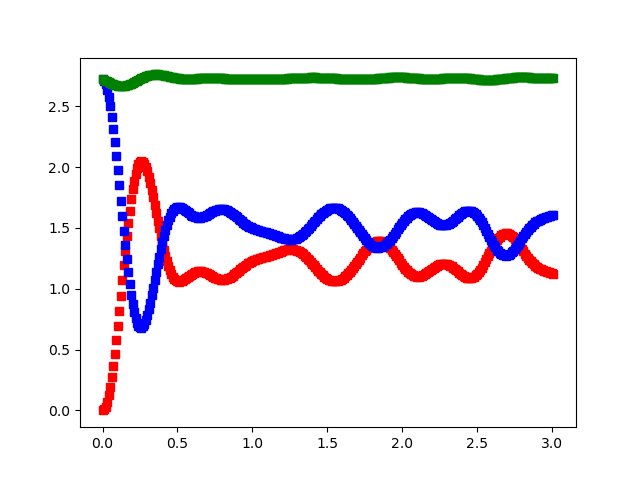

In [5]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')


## Explicit Integration, Dt = 0.001 sec, Total Runtime = 1 seconds

In [6]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.001
while t < 1:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        atom.pos = atom.pos + atom.velocity * dt
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)


<IPython.core.display.Javascript object>

3.7280896909799
3.728350338818454


## Plot for explicit, Dt = 0.001 sec, Total Runtime = 1 seconds

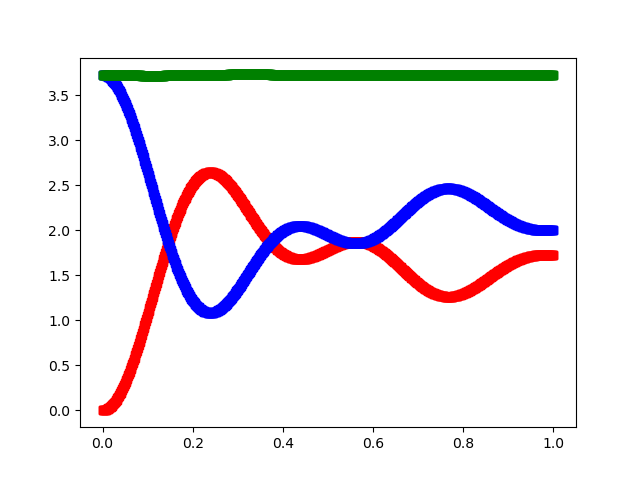

In [7]:

fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')


## Explicit Integration, Dt = 0.0001 sec, Total Runtime = 0.1 seconds

In [8]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.0001
while t < 0.1:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        atom.pos = atom.pos + atom.velocity * dt
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)


<IPython.core.display.Javascript object>

3.3365272380549897
3.3357955135909405


## Plot for explicit, Dt = 0.0001 sec, Total Runtime = 0.1 seconds

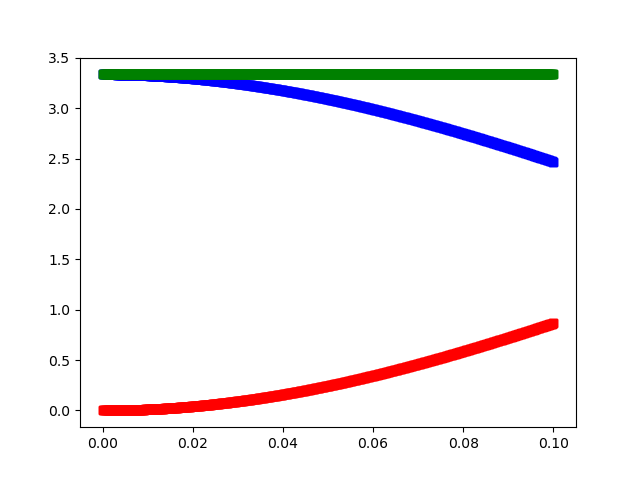

In [9]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')

## Implicit Integration, Dt = 0.01 sec, Total Runtime = 3 seconds

In [10]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.01
while t < 3:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        vel_diff = atom.velocity - atom.old_velocity
        atom.pos = atom.pos + ((atom.old_velocity + vel_diff) * dt)
        atom.old_velocity = atom.velocity
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)


<IPython.core.display.Javascript object>

3.7094946023698943
3.7045354245449023


## Plot for Implicit, Dt = 0.01 sec, Total Runtime = 3 seconds

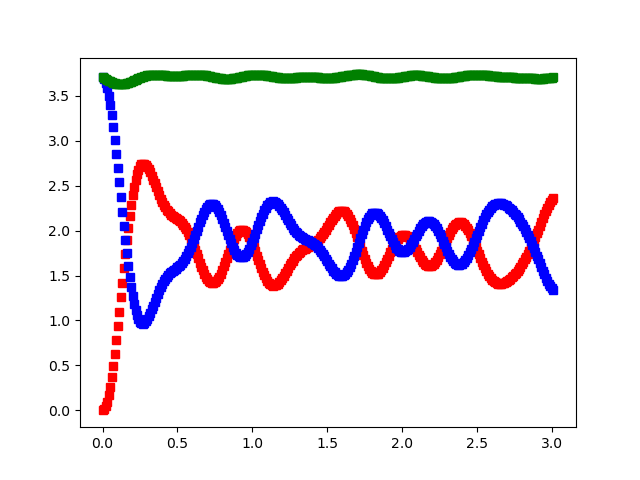

In [11]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')


## Implicit Integration, Dt = 0.001 sec, Total Runtime = 1 seconds

In [12]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.001
while t < 1:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        vel_diff = atom.velocity - atom.old_velocity
        atom.pos = atom.pos + ((atom.old_velocity + vel_diff) * dt)
        atom.old_velocity = atom.velocity
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)


<IPython.core.display.Javascript object>

3.9956940097956837
3.997331905326247


## Plot for Implicit, Dt = 0.001 sec, Total Runtime = 1 seconds

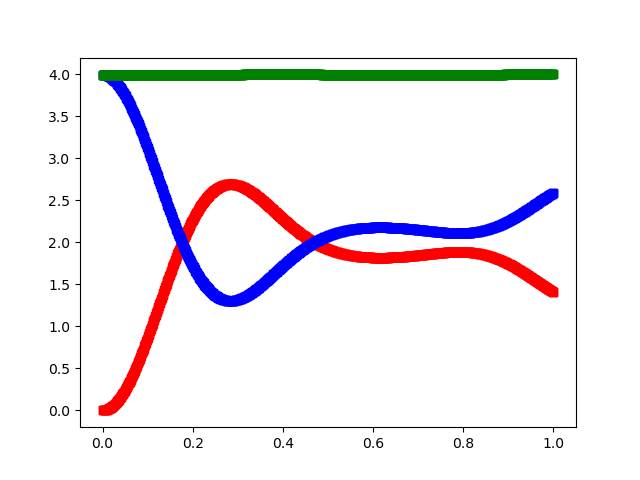

In [13]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')

## Implicit Integration, Dt = 0.0001 sec, Total Runtime = 0.1 seconds

In [14]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.0001
while t < 0.1:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        vel_diff = atom.velocity - atom.old_velocity
        atom.pos = atom.pos + ((atom.old_velocity + vel_diff) * dt)
        atom.old_velocity = atom.velocity
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)


<IPython.core.display.Javascript object>

3.551870089843148
3.551185401721192


## Plot for Implicit, Dt = 0.0001 sec, Total Runtime = 0.1 seconds

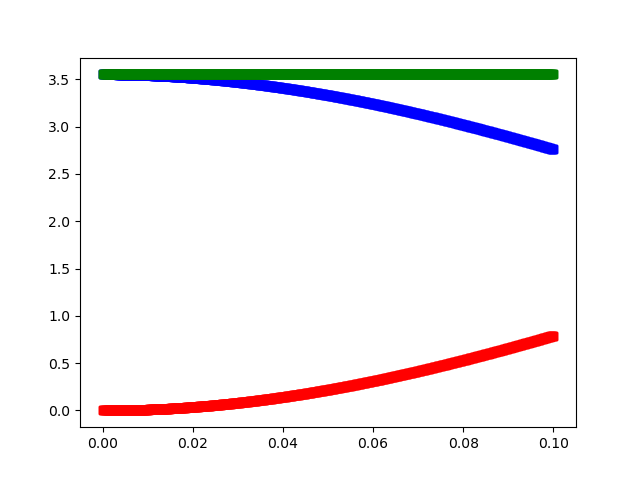

In [15]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')

## Trapezoid Integration, Dt = 0.01 sec, Total Runtime = 3 seconds

In [16]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.01
while t < 3:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        atom.pos = atom.pos + (0.5*(atom.old_velocity + atom.velocity)* dt )
        atom.old_velocity = atom.velocity
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)


<IPython.core.display.Javascript object>

3.6054023334850522
6.320718005644073


## Plot for Trapezoid, Dt = 0.01 sec, Total Runtime = 3 seconds

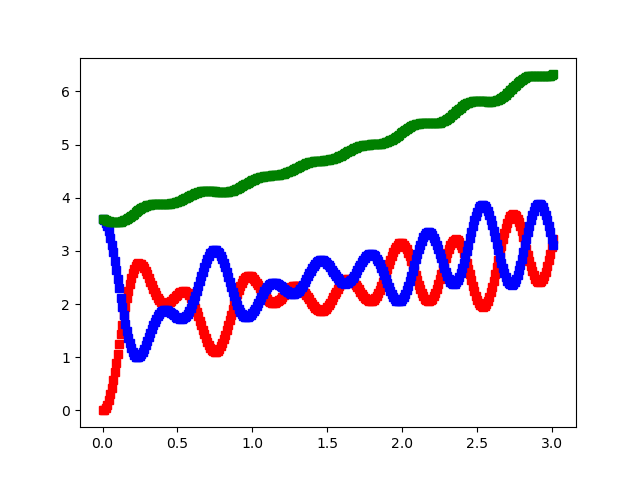

In [17]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')

## Trapezoid Integration, Dt = 0.001 sec, Total Runtime = 1 seconds

In [18]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.001
while t < 1:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        atom.pos = atom.pos + (0.5*(atom.old_velocity + atom.velocity)* dt )
        atom.old_velocity = atom.velocity
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)

<IPython.core.display.Javascript object>

2.6605587895621055
2.700286839221441


## Plot for Trapezoid, Dt = 0.001 sec, Total Runtime = 1 seconds

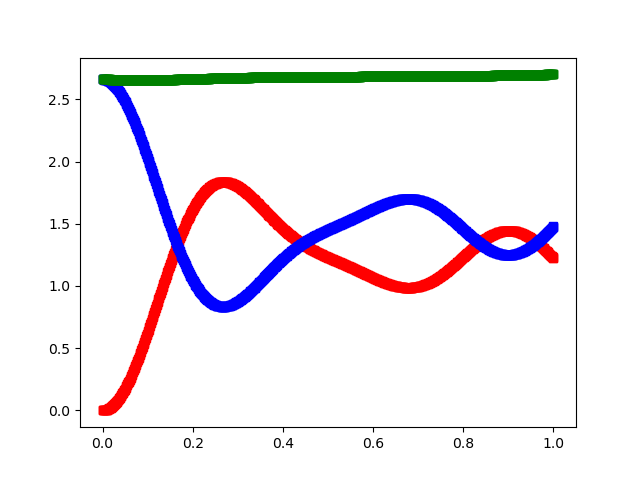

In [19]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')

## Trapezoid Integration, Dt = 0.0001 sec, Total Runtime = 0.1 seconds

In [20]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 10
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.0001
while t < 0.1:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        atom.pos = atom.pos + (0.5*(atom.old_velocity + atom.velocity)* dt )
        atom.old_velocity = atom.velocity
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force
        spring.start.velocity += force
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)

<IPython.core.display.Javascript object>

3.3792431853272977
3.378668534068038


## Plot for Trapezoid, Dt = 0.0001 sec, Total Runtime = 0.1 seconds

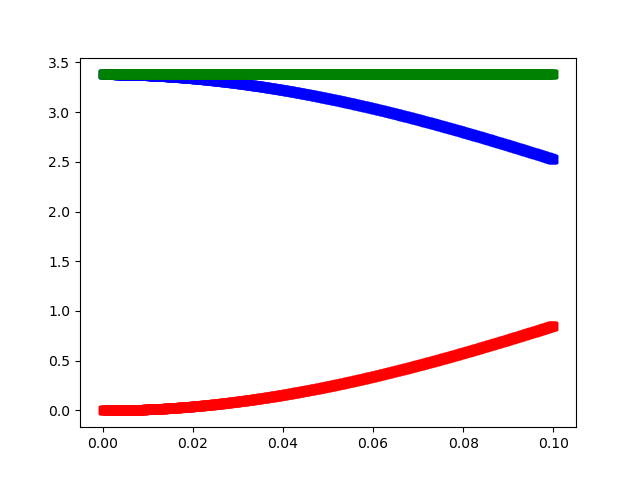

In [21]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')

## Results

My results show that explicit integration is the most accurate at larger timesteps. At the smallest timestep the implicit integration was the most accurate. 

## Simulation with damping

In [47]:
scene = canvas()
class spring:
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.magnitude = mag(end.pos - start.pos) 
c = lattice()
k = 1
pe = []
ke = []
te = []
kenetic = 0
potential = 0 
total = 0
for atom in c.atoms:
    kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
ke.append(kenetic)
pe.append(0)
te.append(kenetic)
print(te[0])
time = []
t = 0
time.append(t)
dt = 0.01
while t < 5:
    rate(50)
    kenetic = 0
    potential = 0
    total = 0
    for atom in c.atoms:
        atom.pos = atom.pos + atom.velocity * dt 
    for spring in c.springs:
        new_pos = spring.end.pos - spring.start.pos
        new_mag = mag(new_pos)
        force =  new_pos * (k * dt * (1 - spring.magnitude/new_mag))
        spring.end.velocity -= force + 0.001* spring.end.velocity
        spring.start.velocity += force - 0.001 * spring.start.velocity
        x = new_mag - spring.magnitude
        potential += 0.5 * k * x**2
    pe.append(potential)
    for atom in c.atoms:
        kenetic += (atom.velocity.x**2 + atom.velocity.y**2 + atom.velocity.z**2)/2
    ke.append(kenetic)  
    te.append(potential + kenetic)
    t += dt
    time.append(t)
print(te[-1])
TotPE = np.array(pe)
TotKE = np.array(ke)
Total = np.array(te)
TotTime = np.array(time)


<IPython.core.display.Javascript object>

3.089627471072633
0.062815673051138


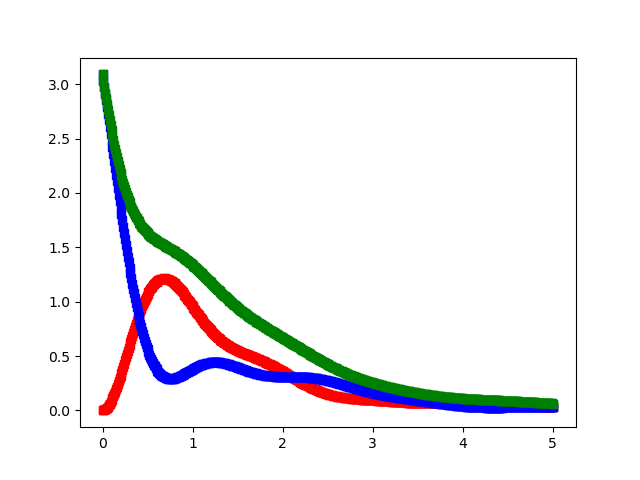

In [48]:
fig, ax = plt.subplots()
ax.plot(TotTime, TotPE, 'rs', TotTime, TotKE, 'bs', TotTime, Total, 'gs')

## Damping results
To add damping to the spring I chose a coefficient of 0.001. This shows the exponential decay of the damped system clearly.